# Importing the Necessary libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [10]:
 train_path = "/content/train_data.txt"
 train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [9]:
 train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [12]:
train_data.describe()

,Title,Genre,Description
count,3178,3178,3178
unique,3178,27,3177
top,Oscar et la dame rose (2009),drama,"Held since 2005, Film Spring Open-Air has bee..."
freq,1,799,2


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3178 entries, 1 to 3178
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3178 non-null   object
 1   Genre        3178 non-null   object
 2   Description  3178 non-null   object
dtypes: object(3)
memory usage: 99.3+ KB


In [14]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [15]:
path = "/content/test_data.txt"
test_data = pd.read_csv(path,sep = ':::',names=['Id','Title','Description'],engine='python')

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           3260 non-null   int64 
 1   Title        3260 non-null   object
 2   Description  3260 non-null   object
dtypes: int64(1), object(2)
memory usage: 76.5+ KB


In [17]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

# Exploratory Data Analysis

In [24]:
train_data.groupby('Genre').count()

,Title,Description
Genre,,
action,80,80
adult,43,43
adventure,42,42
animation,27,27
biography,25,25
comedy,441,441
crime,23,23
documentary,749,749
drama,799,799


<ipython-input-22-70dd53c41e0b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='Count', y='Genre', palette='viridis')


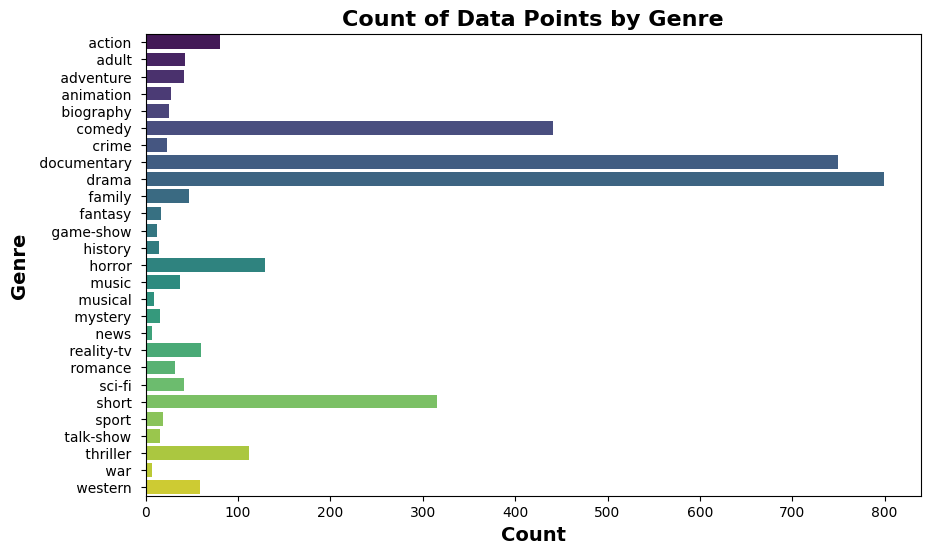

In [22]:
genre_counts = train_data.groupby('Genre').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts, x='Count', y='Genre', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Count of Data Points by Genre')
plt.show()

# Data Cleaning

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

# Data Preprocessing

Text(0.5, 1.0, 'Distributions of length')

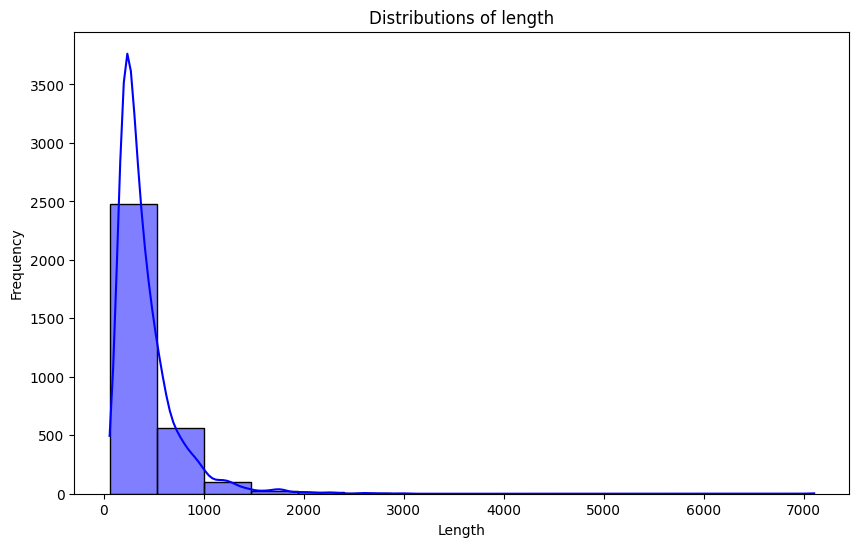

In [34]:
train_data['length_of_text'] = train_data['Text_cleaning'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(train_data['length_of_text'],color='Blue',kde=True,bins=15)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distributions of length')

# Text Vectorization

In [35]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

# Split the Data

In [37]:
x = X_train
y = train_data['Genre']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Build the Model

In [65]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [39]:
logreg_train_predict = logreg.predict(xtrain)
logreg_test_predict = logreg.predict(xtest)

# Performance Metrics

In [45]:
def model_eval(actual,pred):
  accuracy = accuracy_score(actual,pred)
  class_report = classification_report(actual,pred)
  print("accuracy of the model is:",accuracy)
  print(class_report)

In [64]:
model_eval(ytest,logreg_test_predict)

accuracy of the model is: 0.4606918238993711
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        15
       adult        0.00      0.00      0.00        11
   adventure        0.00      0.00      0.00         8
   animation        0.00      0.00      0.00         6
   biography        0.00      0.00      0.00         4
      comedy        0.43      0.22      0.29        74
       crime        0.00      0.00      0.00         6
 documentary        0.54      0.88      0.67       160
       drama        0.40      0.88      0.55       154
      family        0.00      0.00      0.00        10
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         2
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        23
       music        0.00      0.00      0.00        16
     musical        0.00      0.00      0.00         2
     mystery       

# Build MultinomialNB Model

In [47]:
multinb = MultinomialNB()
multinb.fit(xtrain,ytrain)

MultinomialNB()

In [48]:
multinb_train_predict = multinb.predict(xtrain)
multinb_test_predict = multinb.predict(xtest)

In [49]:
model_eval(ytest,multinb_test_predict)

accuracy of the model is: 0.42924528301886794
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        15
       adult        0.00      0.00      0.00        11
   adventure        0.00      0.00      0.00         8
   animation        0.00      0.00      0.00         6
   biography        0.00      0.00      0.00         4
      comedy        0.00      0.00      0.00        74
       crime        0.00      0.00      0.00         6
 documentary        0.58      0.82      0.68       160
       drama        0.35      0.92      0.50       154
      family        0.00      0.00      0.00        10
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         2
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        23
       music        0.00      0.00      0.00        16
     musical        0.00      0.00      0.00         2
     mystery      

In [57]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(xtrain,ytrain)

SVC(kernel='linear')

In [58]:
svm_train_predict = clf.predict(xtrain)
svm_test_predict = clf.predict(xtest)

In [59]:
model_eval(ytest,svm_test_predict)

accuracy of the model is: 0.4748427672955975
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        15
       adult        0.00      0.00      0.00        11
   adventure        0.00      0.00      0.00         8
   animation        0.00      0.00      0.00         6
   biography        0.00      0.00      0.00         4
      comedy        0.37      0.31      0.34        74
       crime        0.00      0.00      0.00         6
 documentary        0.57      0.86      0.69       160
       drama        0.42      0.89      0.57       154
      family        0.00      0.00      0.00        10
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         2
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        23
       music        0.00      0.00      0.00        16
     musical        0.00      0.00      0.00         2
     mystery       

In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=6, n_estimators=200)

In [73]:
rfc_train_predict = rfc.predict(xtrain)
rfc_test_predict = rfc.predict(xtest)

In [74]:
model_eval(ytest,rfc_test_predict)

accuracy of the model is: 0.39622641509433965
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        15
       adult        0.00      0.00      0.00        11
   adventure        0.00      0.00      0.00         8
   animation        0.00      0.00      0.00         6
   biography        0.00      0.00      0.00         4
      comedy        0.00      0.00      0.00        74
       crime        0.00      0.00      0.00         6
 documentary        0.64      0.67      0.65       160
       drama        0.31      0.94      0.47       154
      family        0.00      0.00      0.00        10
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         2
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        23
       music        0.00      0.00      0.00        16
     musical        0.00      0.00      0.00         2
     mystery      